In [ ]:
#HW1-linear regression example
#官網網址: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [4]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [6]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [7]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [9]:
diabetes_y_pred = regr.predict(diabetes_X_test)

In [10]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


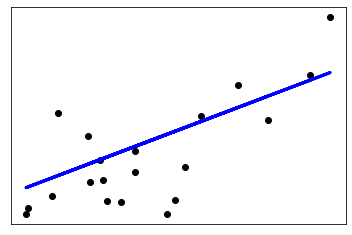

In [11]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# tensorflow beginner

In [13]:
import tensorflow as tf

In [14]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [16]:
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[-1.0920904 , -0.19598578,  0.83218795,  0.07625024, -0.15364984,
         0.14819294,  0.13029236, -0.09798287, -0.17818533, -0.49450362]],
      dtype=float32)

In [17]:
tf.nn.softmax(predictions).numpy()

array([[0.03340144, 0.0818349 , 0.22880667, 0.10744077, 0.08537383,
        0.11545518, 0.11340685, 0.0902611 , 0.08330463, 0.0607147 ]],
      dtype=float32)

In [18]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [19]:
loss_fn(y_train[:1], predictions).numpy()

2.1588728

In [20]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.3022 - accuracy: 0.9124
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1482 - accuracy: 0.9564
Epoch 3/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1093 - accuracy: 0.9667
Epoch 4/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0908 - accuracy: 0.9719
Epoch 5/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0755 - accuracy: 0.9764


In [22]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 1s - loss: 0.0403 - accuracy: 0.9765


[0.07872189237957354, 0.9765]

In [23]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [24]:
probability_model(x_test[:5])

<tf.Tensor: id=30015, shape=(5, 10), dtype=float32, numpy=
array([[1.3745479e-06, 2.7899691e-08, 1.7677712e-04, 3.3789457e-04,
        3.2930456e-13, 6.1249227e-07, 3.4039494e-12, 9.9947876e-01,
        3.3606759e-06, 1.1351766e-06],
       [2.0469940e-08, 2.5702349e-04, 9.9971694e-01, 2.0880045e-06,
        1.6056758e-14, 1.8208331e-05, 4.1139882e-07, 9.6379888e-14,
        5.2307182e-06, 1.2556942e-12],
       [6.7146473e-08, 9.9959427e-01, 1.7792387e-04, 5.0162212e-06,
        1.1626327e-05, 1.2428321e-05, 1.3785002e-05, 1.1610599e-04,
        6.8462439e-05, 1.9132811e-07],
       [9.9991155e-01, 5.8162115e-09, 5.7507052e-05, 7.0490464e-06,
        6.8595838e-08, 1.2133014e-06, 1.6869581e-05, 3.3847380e-06,
        8.2956809e-08, 2.2211609e-06],
       [5.6599501e-06, 8.6412065e-08, 5.1981860e-05, 3.5502762e-08,
        9.7612417e-01, 1.2257813e-06, 1.3475546e-06, 3.4665730e-04,
        4.1442263e-06, 2.3464650e-02]], dtype=float32)>